In [21]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [47]:
%matplotlib inline

# import base packages into the namespace for this program
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#SKlearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, classification_report

In [23]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras
from keras import models
from keras import layers

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#define functions for confusion matrix
def draw_confusion_matrix(model,test_X,test_y):

    cnf_matrix = confusion_matrix(test_y, model.predict(test_X))
    # create heatmap
    fig, ax = plt.subplots()

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [26]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Final Project/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Preparing the data

In [27]:
# Update target variable to poisonous
data.loc[data['class']=='p', 'class'] = 1
data.loc[data['class']=='e', 'class'] = 0
data=data.rename(columns={'class':'poisonous'})

In [28]:
X, y = data.drop('poisonous',1), data['poisonous']
X = pd.get_dummies(X, prefix = 'is')
y = y.astype('int')

In [29]:
# Split train/test data
train_X,test_X,train_y,test_y = train_test_split(X,y,train_size=0.8,test_size=0.2)

In [30]:
print(train_X.shape)
print(test_X.shape)

(6499, 117)
(1625, 117)


In [31]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(117, )))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=['accuracy'])
    return model

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(117, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=['accuracy'])

In [33]:
model = build_model()
# Train the model
history =model.fit(train_X, train_y,
              epochs=5, batch_size=128, verbose=1)

Epoch 1/5
51/51 [==============================] - 2s 4ms/step - loss: 0.2078 - accuracy: 0.9548
Epoch 2/5
51/51 [==============================] - 0s 4ms/step - loss: 0.0216 - accuracy: 0.9977
Epoch 3/5
51/51 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 0.9998
Epoch 4/5
51/51 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/5
51/51 [==============================] - 0s 5ms/step - loss: 2.5832e-04 - accuracy: 1.0000


In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                7552      
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 8,609
Trainable params: 8,609
Non-trainable params: 0
_________________________________________________________________


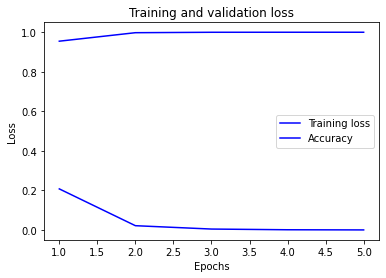

In [35]:
loss = history.history['loss']
val_loss = history.history['accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 257.44, 'Predicted label')

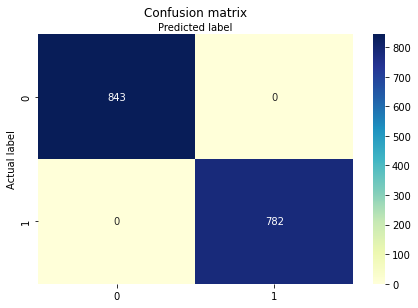

In [48]:
preds = np.round(model.predict(test_X),0)

cnf_matrix = confusion_matrix(test_y, preds)
# create heatmap
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')